In [2]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable
sns.set_style('whitegrid')
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\bhara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#pip install sidetable


# Exploratory Data Analysis (EDA) :---

In [3]:
df=pd.read_csv("C:\data\insurance.csv") # load the data set

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape # knowing the sahpe of the data

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.describe() # knoing the statistical describe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe(include='all') # describe the all the columns

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Checking the `Null Values `

In [10]:
[features for features in df.columns if df[features].isna().sum()>0] # there is no null vaues in dataset

[]

In [11]:
df.isna().sum() # another approach to getting the null vbaues

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# checking `Duplicates`

In [12]:
df.duplicated().sum()

1

In [13]:
df[df.duplicated] # duplicates in dataframe

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
df.drop_duplicates(keep='first',inplace=True) # drop the duplicates in the datafram

In [15]:
df.shape # again checking the datafram after removing the duplicates

(1337, 7)

In [16]:
df.iloc[550:582]

,age,sex,bmi,children,smoker,region,charges
550,63,male,30.800,0,no,southwest,13390.55900
551,32,female,28.930,0,no,southeast,3972.92470
552,62,male,21.400,0,no,southwest,12957.11800
553,52,female,31.730,2,no,northwest,11187.65670
554,25,female,41.325,0,no,northeast,17878.90068
555,28,male,23.800,2,no,southwest,3847.67400
556,46,male,33.440,1,no,northeast,8334.58960
557,34,male,34.210,0,no,southeast,3935.17990
558,35,female,34.105,3,yes,northwest,39983.42595
559,19,male,35.530,0,no,northwest,1646.42970


#  ' skewness'

In [17]:
df.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

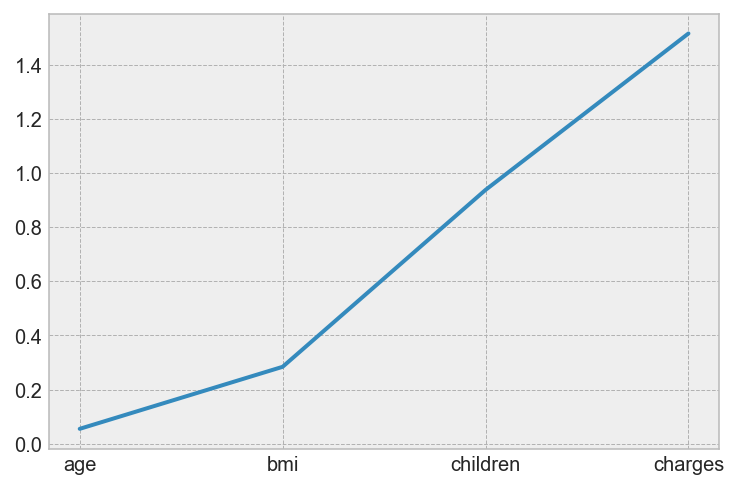

In [18]:
plt.plot(df.skew());

# checking outliers by using ` Z-Score`

In [19]:
import scipy.stats as stats
zscore_array = stats.zscore(df.bmi)
np.where(zscore_array>2,1,0).sum()
np.where(zscore_array<-2,1,0).sum()
print('='*30)
zscore_array = stats.zscore(df.charges)
np.where(zscore_array>2,1,0).sum()
np.where(zscore_array<-2,1,0).sum()

37

20

107

0

In [3]:
from scipy import stats # import stat modele

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
df['zscore_age']=stats.zscore(df['age']) # crearing a columns  on age z-score

In [23]:
#df.drop(['z=score','z-score'],axis=1,inplace=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958


In [25]:
df=df.loc[df['zscore_age'].abs()<3] # removing outliesrs 

In [26]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958


In [27]:
df['zscore_bmi']=stats.zscore(df['bmi']) # creating a columns on bmi z-score

In [28]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524


In [29]:
df=df.loc[df['zscore_bmi'].abs()<3] # removing the outliers in bmi

In [30]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524


In [31]:
df['zscore_children']=stats.zscore(df['children']) # create a column on children

In [32]:
df=df.loc[df['zscore_children'].abs()<3] # removing the ouliers in children

In [33]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524,-0.909922


In [34]:
df['zscore_charges']=stats.zscore(df['charges'])# create a column on charges

In [35]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524,-0.909922,-0.932432


In [36]:
df=df.loc[df['zscore_charges'].abs()<3] # removing the ouliers in charges

In [37]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524,-0.909922,-0.932432


In [38]:
df.shape

(1308, 11)

In [ ]:
# checking the outliers by using boxplot

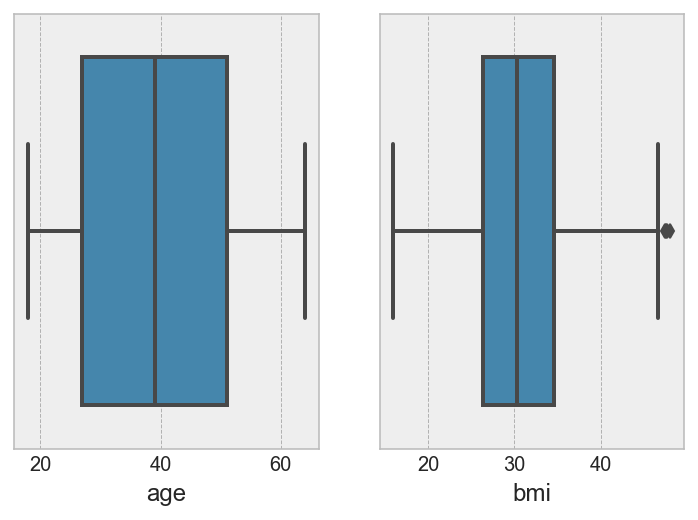

In [39]:
plt.subplot(121)
sns.boxplot(df.age)

plt.subplot(122)

sns.boxplot(df.bmi);

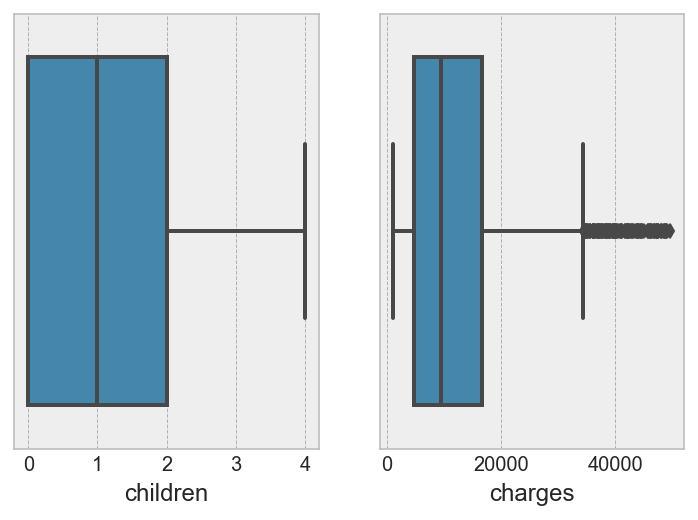

In [40]:
plt.subplot(121)
sns.boxplot(df.children)
plt.subplot(122)
sns.boxplot(df.charges);

# removing outliers by using `IQR Method`

In [41]:
Q1,Q2,Q3=tuple(df.bmi.quantile (q= [0.25,0.5,0.75]).values)

In [42]:
print(Q1,Q2,Q3)

26.30875 30.305 34.585


In [43]:
IQR=Q3-Q1

In [44]:
UL=Q3+1.5*IQR

In [45]:
LL=Q1-1.5*IQR

In [46]:
UL=round(UL,2)
LL=round(LL,2)
IQR=round(IQR,2)
IQR
UL
LL

8.28

47.0

13.89

In [47]:
drop_list=df[(df.bmi < LL) | (df.bmi > UL)].index.tolist()

In [48]:
drop_list

[286, 401, 860, 1088]

In [49]:
df.drop(drop_list,axis=0,inplace=True)

In [50]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524,-0.909922,-0.932432


<AxesSubplot:xlabel='bmi'>

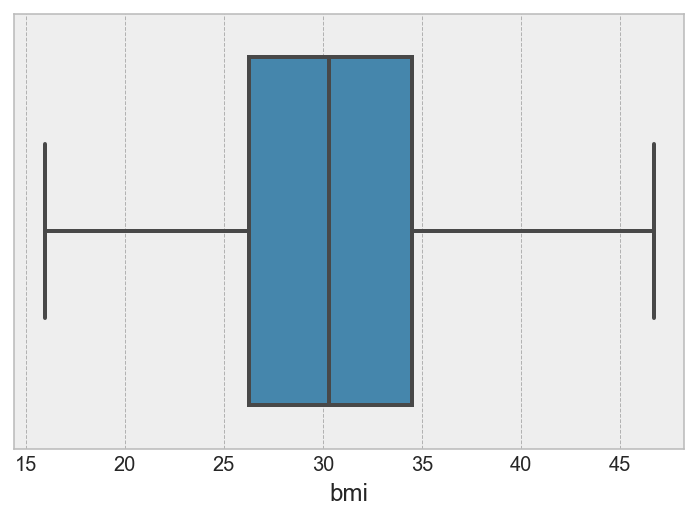

In [51]:
sns.boxplot(df.bmi) # checking the outliers on bmi column

In [52]:
Q1,Q2,Q3=tuple(df.charges.quantile (q= [0.25,0.5,0.75]).values) # removing ouliers in charges column

In [53]:
Q1,Q2,Q3

(4683.139575, 9369.61575, 16579.959052500002)

In [54]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

11896.82 34425.19 -13162.09


In [55]:
drop_list=df[(df.charges < LL ) | ( df.charges > UL)].index.tolist()

In [56]:
drop_list

[14,
 19,
 23,
 29,
 30,
 38,
 39,
 49,
 53,
 55,
 82,
 84,
 86,
 94,
 109,
 123,
 146,
 158,
 161,
 175,
 185,
 203,
 223,
 240,
 242,
 251,
 252,
 254,
 256,
 263,
 265,
 271,
 281,
 288,
 292,
 298,
 312,
 314,
 322,
 327,
 328,
 330,
 338,
 373,
 377,
 381,
 420,
 421,
 422,
 441,
 476,
 488,
 500,
 524,
 530,
 549,
 558,
 569,
 587,
 609,
 615,
 618,
 621,
 623,
 629,
 665,
 667,
 668,
 674,
 677,
 682,
 689,
 697,
 706,
 725,
 736,
 738,
 739,
 742,
 759,
 803,
 826,
 828,
 842,
 845,
 850,
 852,
 856,
 883,
 893,
 901,
 917,
 947,
 951,
 953,
 956,
 958,
 1001,
 1012,
 1021,
 1022,
 1031,
 1036,
 1037,
 1049,
 1062,
 1070,
 1078,
 1090,
 1096,
 1111,
 1117,
 1118,
 1122,
 1124,
 1139,
 1152,
 1156,
 1186,
 1206,
 1207,
 1218,
 1240,
 1241,
 1249,
 1284,
 1288,
 1291,
 1301,
 1303,
 1313,
 1323]

In [57]:
df.drop(drop_list,axis=0,inplace=True)

In [58]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556
1336,21,female,25.800,0,no,southwest,2007.94500,-1.297958,-0.797524,-0.909922,-0.932432


<AxesSubplot:xlabel='charges'>

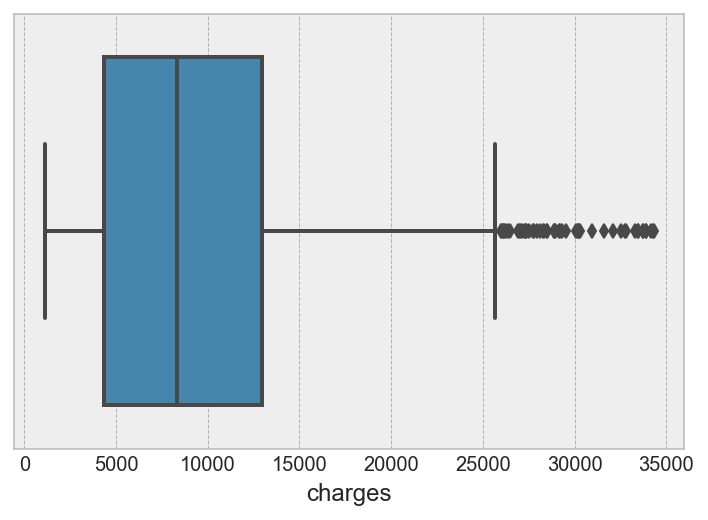

In [59]:
sns.boxplot(df.charges)

In [60]:
Q1,Q2,Q3=tuple(df.charges.quantile(q=[0.25,0.5,0.75]).values) # removing outliers in charges

In [61]:
Q1,Q2,Q3

(4355.4113375, 8345.036525, 12981.72795)

In [62]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [63]:
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
IQR
LL
UL

8626.32

-8584.06

25921.2

In [64]:
drop_list=df[(df.charges < LL) | (df.charges >UL)].index.tolist()

In [65]:
df.drop(drop_list,axis=0,inplace=True)

In [66]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


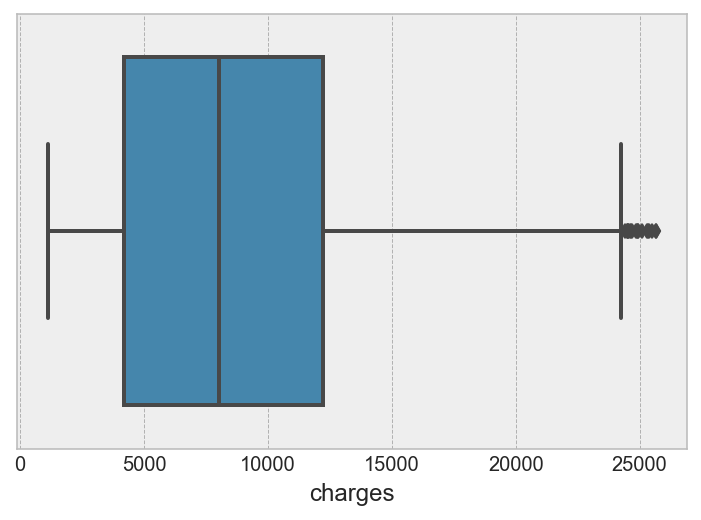

In [67]:
sns.boxplot(df.charges);

In [68]:
Q1,Q2,Q3=tuple(df.charges.quantile(q=[0.25,0.5,0.75]).values) # again removing outliers in cahrges

In [69]:
Q1,Q2,Q3

(4212.020049999999, 8017.06115, 12240.1851)

In [70]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [71]:
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

8028.17 24282.43 -7830.23


In [72]:
drop_list=df[(df.charges < LL ) | ( df.charges > UL )].index.tolist()

In [73]:
df.drop(drop_list,axis=0,inplace=True)

In [74]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


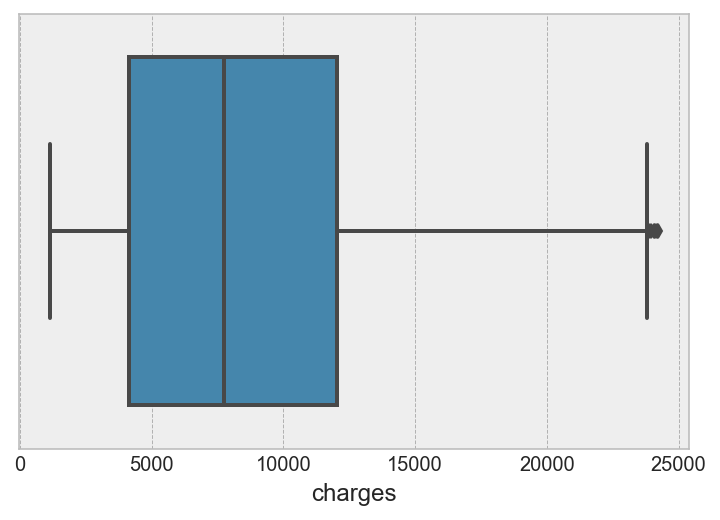

In [75]:
sns.boxplot(df.charges); # outlier is there in charges column

In [76]:
Q1,Q2,Q3=tuple(df.charges.quantile(q=[0.25,0.5,0.75]).values)   # removing outliers on charges    

In [77]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

7893.38 23870.12 -7703.41


In [78]:
drop_list=df[(df.charges < LL) | (df.charges > UL )].index.tolist()

In [79]:
df.drop(drop_list,axis=0,inplace=True)

In [80]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


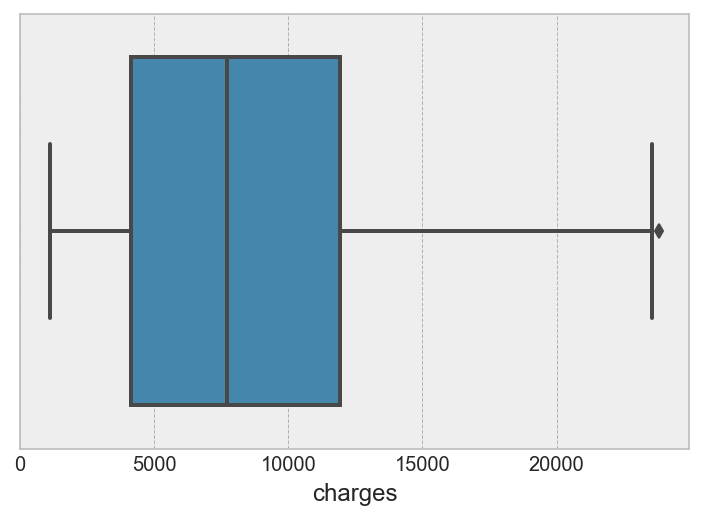

In [81]:
sns.boxplot(df.charges); # outlier is there in charges

In [82]:
Q1,Q2,Q3=tuple(df.charges.quantile(q=[0.25,0.5,0.75]).values)   # removing the outliers on charges    

In [83]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

7809.26 23656.9 -7580.13


In [84]:
drop_list=df[(df.charges < LL) | (df.charges > UL )].index.tolist()

In [85]:
df.drop(drop_list,axis=0,inplace=True)

In [86]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


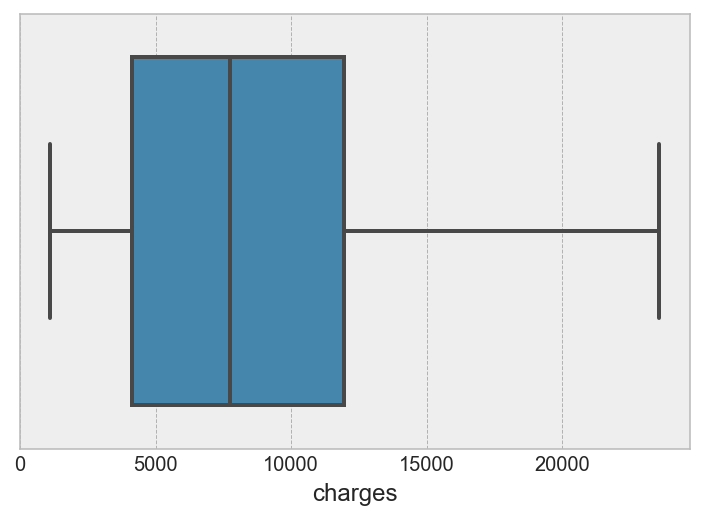

In [87]:
sns.boxplot(df.charges); # finally we don't have the outlirs in charges column

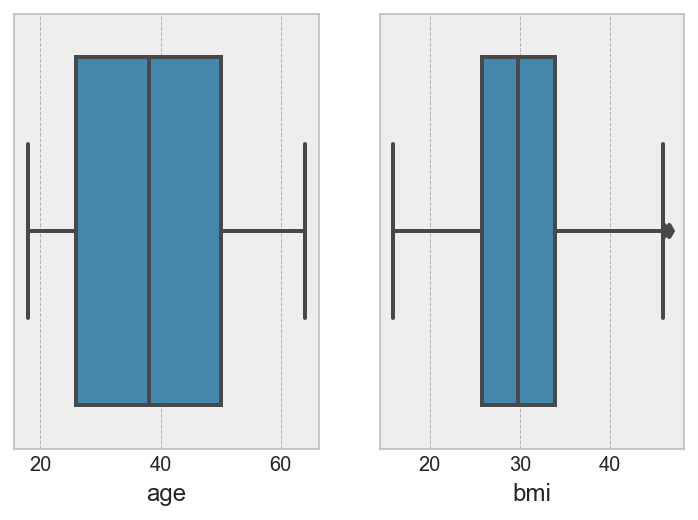

In [88]:
# cheching the outliers all numerical columns in dataframe
plt.subplot(121)
sns.boxplot(df.age)
plt.subplot(122)
sns.boxplot(df.bmi);# bmi has a some outiers

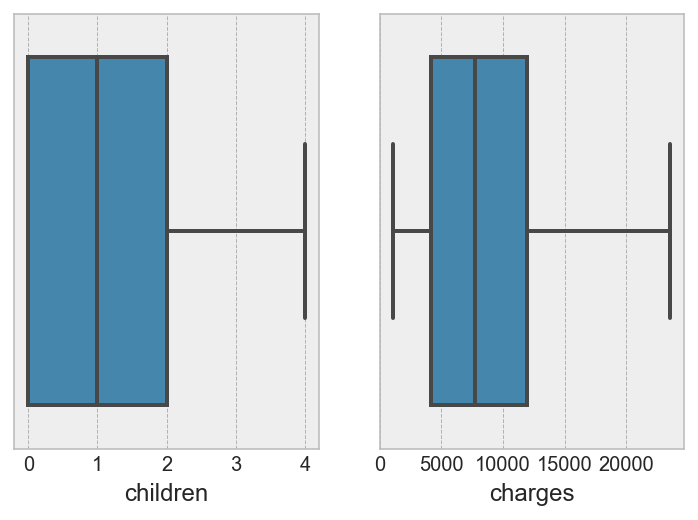

In [89]:
plt.subplot(121)
sns.boxplot(df.children)
plt.subplot(122)
sns.boxplot(df.charges);

In [90]:
Q1,Q2,Q3=tuple(df.bmi.quantile(q=[0.25,0.5,0.75]).values) # removing outliers on bmi column

In [91]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

8.11 46.09 13.63


In [92]:
drop_list=df[(df.bmi < LL) | (df.bmi > UL )].index.tolist()

In [93]:
df.drop(drop_list,axis=0,inplace=True)

In [94]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


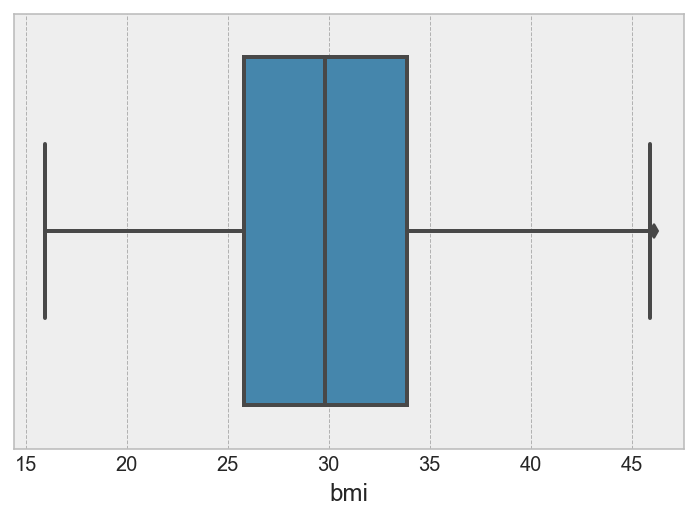

In [96]:
sns.boxplot(df.bmi); # Checking the outliers in bmi 

In [97]:
Q1,Q2,Q3=tuple(df.bmi.quantile(q=[0.25,0.5,0.75]).values) # removing the outliers on bmi column

In [98]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

8.08 46.0 13.68


In [99]:
drop_list=df[(df.bmi < LL) | (df.bmi > UL )].index.tolist()

In [100]:
df.drop(drop_list,axis=0,inplace=True)

In [101]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


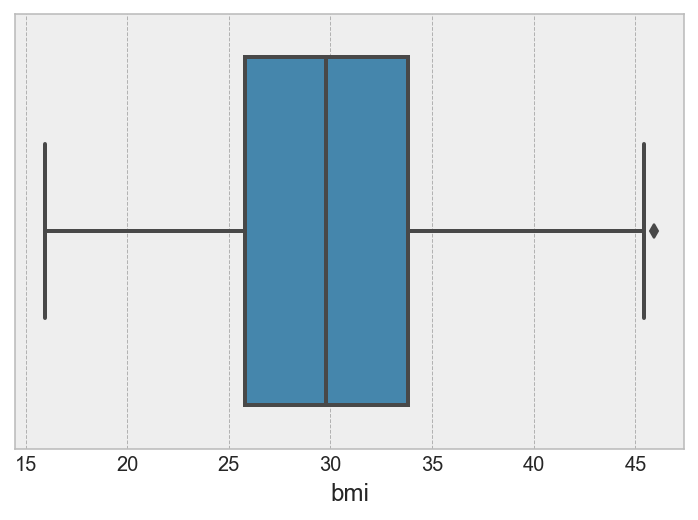

In [103]:
sns.boxplot(df.bmi);

In [104]:
Q1,Q2,Q3=tuple(df.bmi.quantile(q=[0.25,0.5,0.75]).values) # removing the outliers on bmi

In [105]:
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
IQR=round(IQR,2)
UL=round(UL,2)
LL=round(LL,2)
print(IQR,UL,LL)

8.04 45.89 13.75


In [106]:
drop_list=df[(df.bmi < LL) | (df.bmi > UL )].index.tolist()

In [107]:
df.drop(drop_list,axis=0,inplace=True)

In [108]:
df

,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419
...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.910164,2.301758,1.577282,-0.158379
1333,50,male,30.970,3,no,northwest,10600.54830,0.767704,0.050269,1.577282,-0.225146
1334,18,female,31.920,0,no,northeast,2205.98080,-1.511647,0.206053,-0.909922,-0.916131
1335,18,female,36.850,0,no,southeast,1629.83350,-1.511647,1.014490,-0.909922,-0.963556


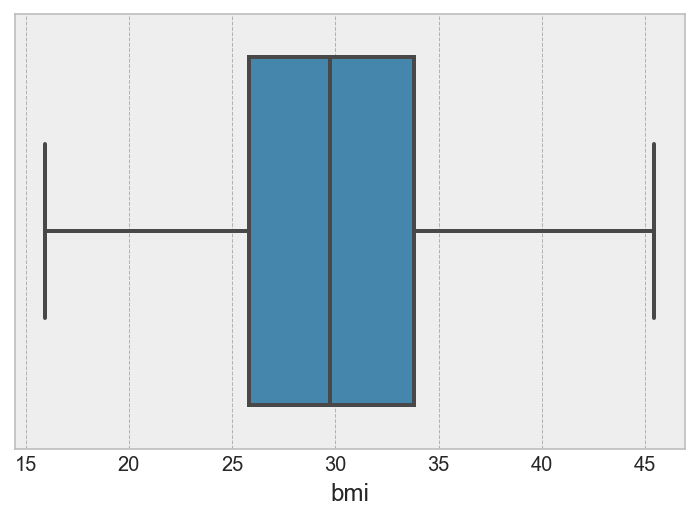

In [110]:
sns.boxplot(df.bmi); # fianally there is no outliers in bmi column

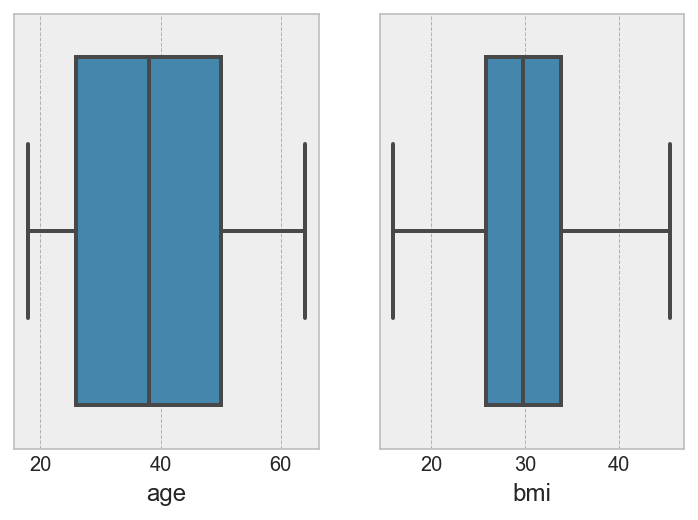

In [114]:
# again we check the outliers in the dataframe of all nuerical coulmns
plt.subplot(121)
sns.boxplot(df.age)
plt.subplot(122)
sns.boxplot(df.bmi);


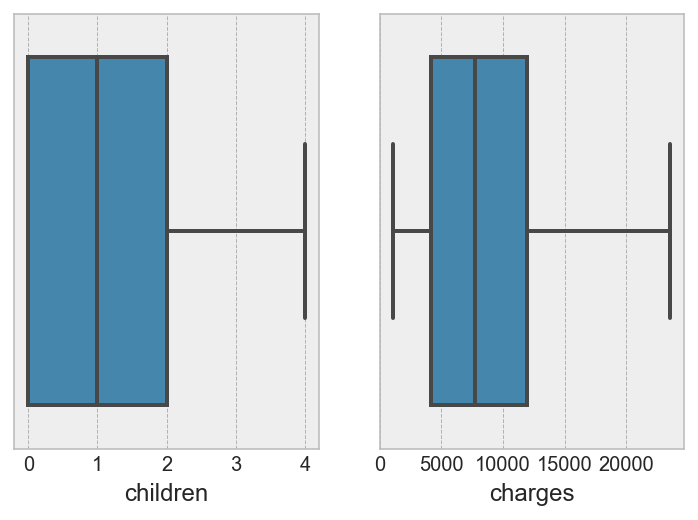

In [115]:
plt.subplot(121)
sns.boxplot(df.children)
plt.subplot(122)
sns.boxplot(df.charges);

# save cleaning part in `CSV-Fromat`

In [116]:
df.to_csv("C:\data\insu_cleaned_df.csv")

# load the DATASET

In [9]:
me_df=pd.read_csv("C:\data\insu_cleaned_df.csv")

In [10]:
me_df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,zscore_age,zscore_bmi,zscore_children,zscore_charges
0,0,19,female,27.900,0,yes,southwest,16884.92400,-1.440418,-0.453160,-0.909922,0.292142
1,1,18,male,33.770,1,no,southeast,1725.55230,-1.511647,0.509422,-0.080854,-0.955677
2,2,28,male,33.000,3,no,southeast,4449.46200,-0.799350,0.383155,1.577282,-0.731463
3,3,33,male,22.705,0,no,northwest,21984.47061,-0.443201,-1.305052,-0.909922,0.711903
4,4,32,male,28.880,0,no,northwest,3866.85520,-0.514431,-0.292456,-0.909922,-0.779419


In [14]:
me_df.drop(['zscore_age','zscore_bmi','zscore_children','zscore_charges'],axis=1,inplace=True)

In [15]:
me_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1082,52,female,44.700,3,no,southwest,11411.68500
1083,50,male,30.970,3,no,northwest,10600.54830
1084,18,female,31.920,0,no,northeast,2205.98080
1085,18,female,36.850,0,no,southeast,1629.83350


# analysis

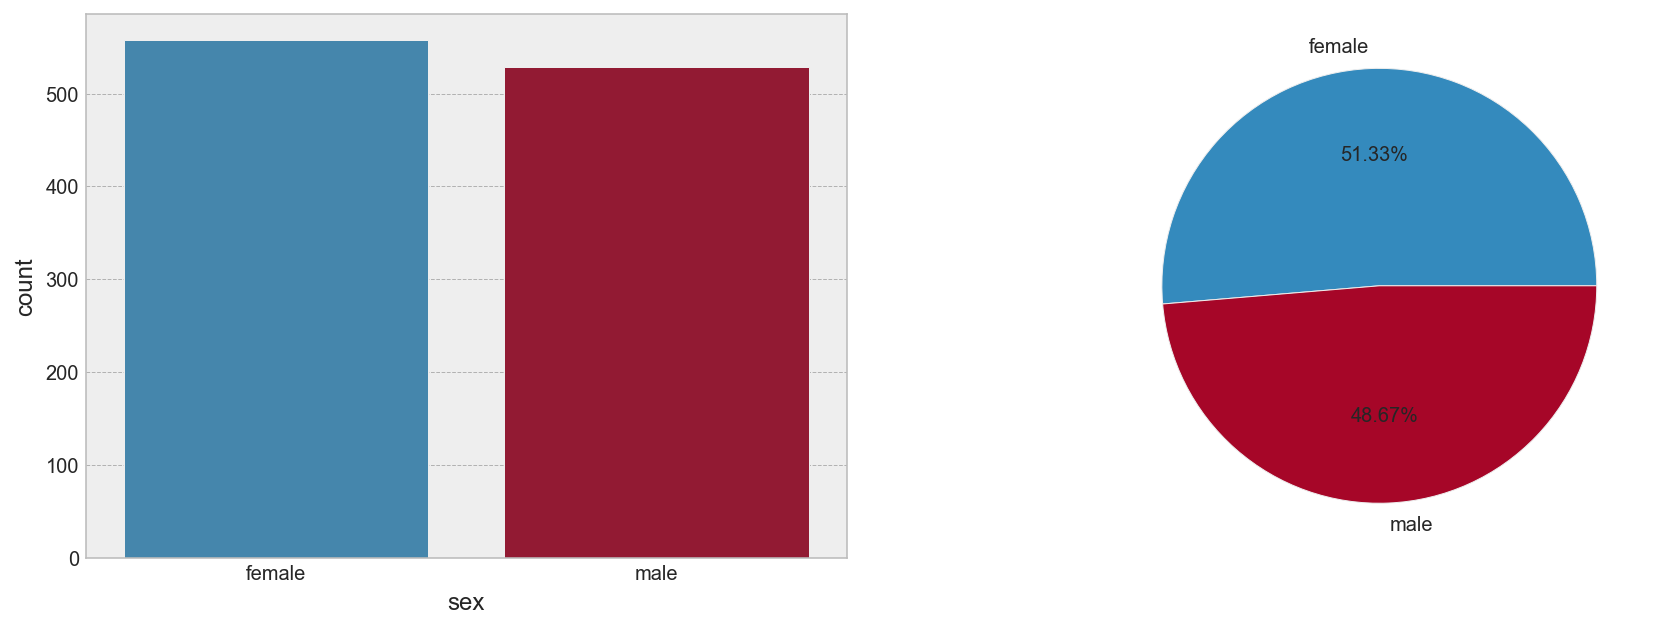

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=me_df.sex)
plt.subplot(122)
plt.pie(me_df.sex.value_counts().values,labels=me_df.sex.value_counts().index,autopct='%.2f%%');

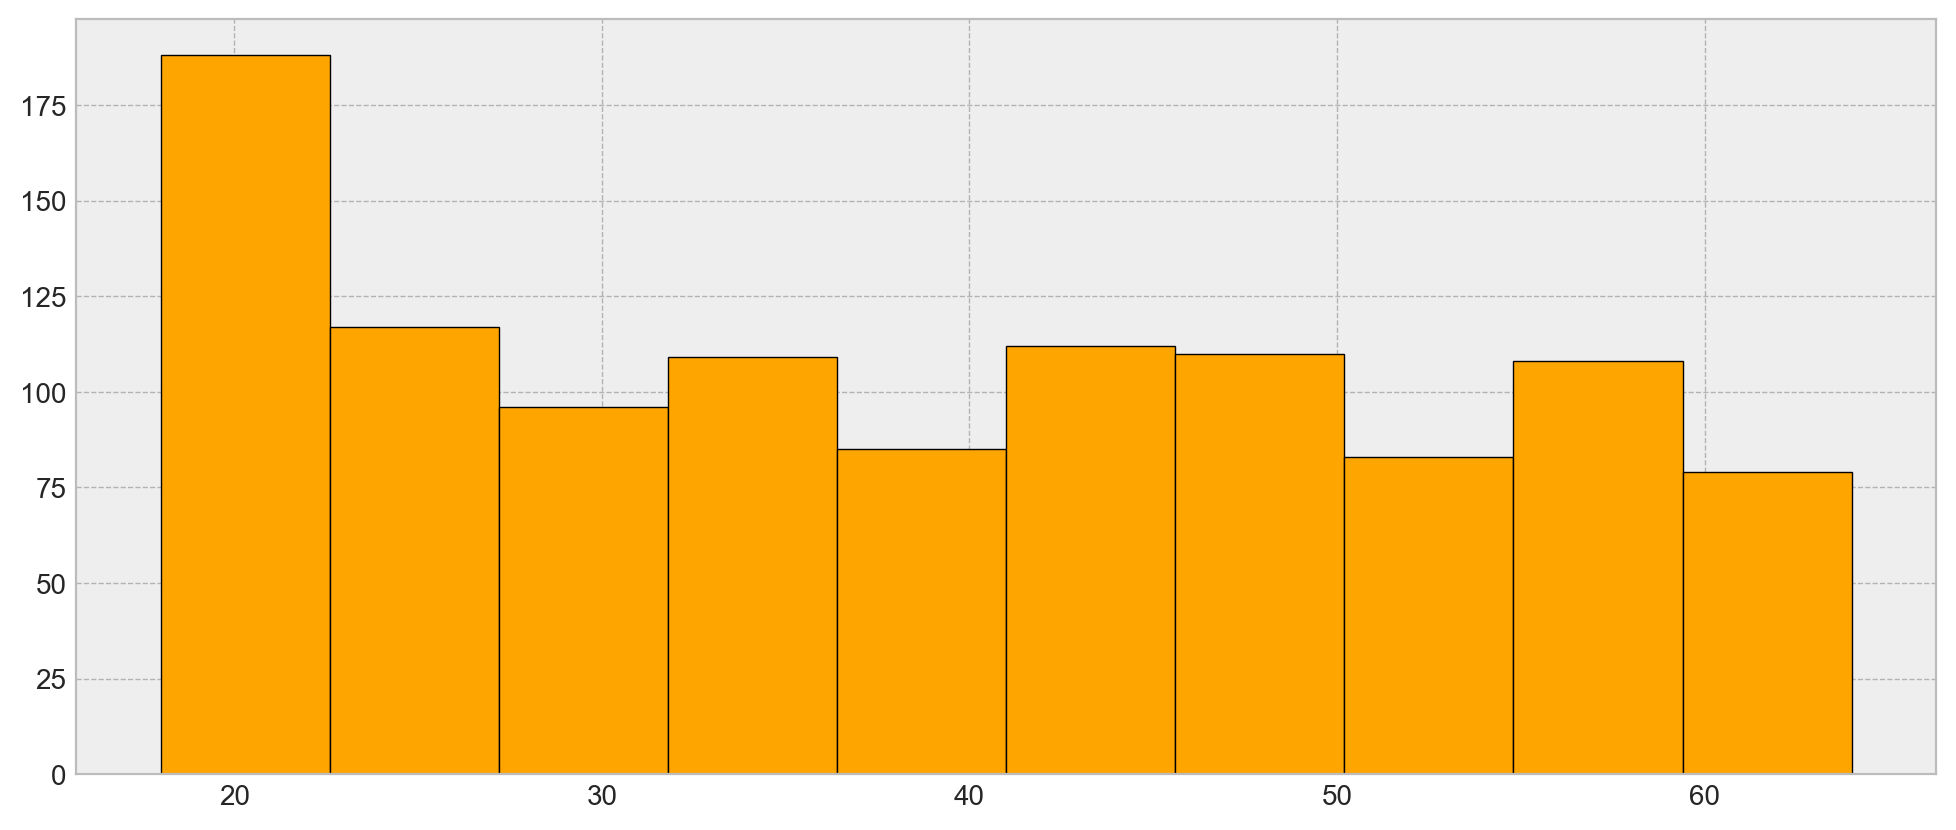

In [17]:
plt.figure(figsize=(12,5), dpi = 100)
plt.hist(me_df.age, color = 'orange', edgecolor = 'black')
plt.show();

In [19]:
me_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


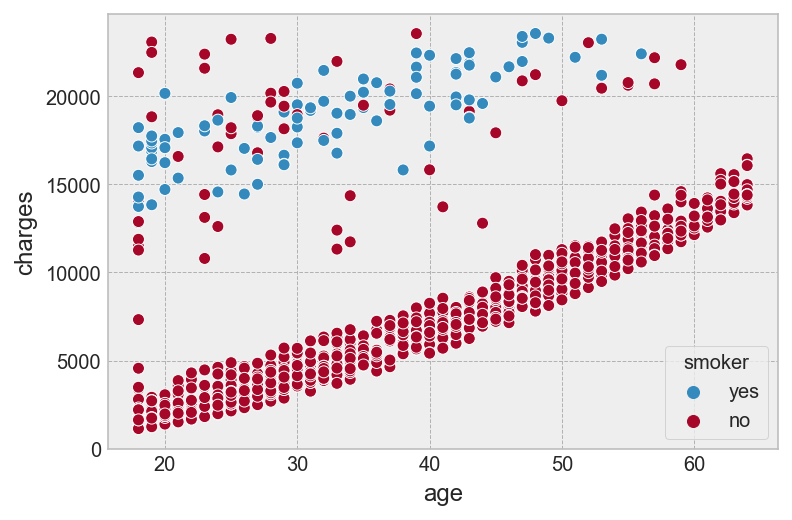

In [23]:
sns.scatterplot(x=me_df.age,y=me_df.charges,hue=me_df.smoker);


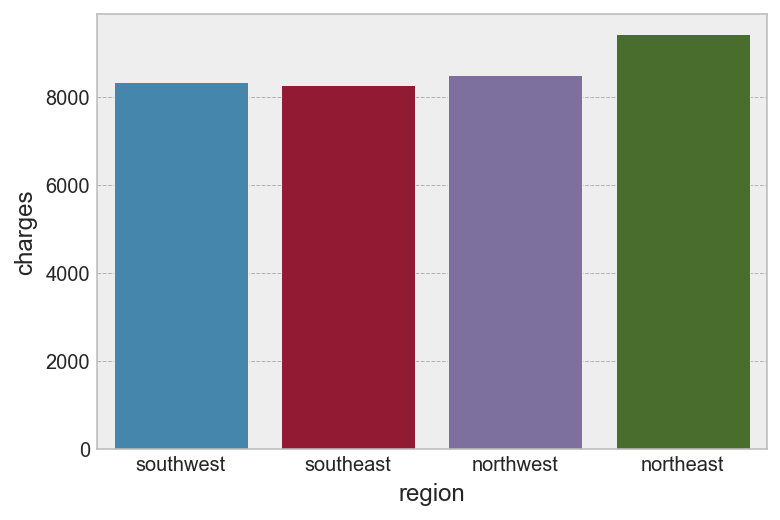

In [25]:
sns.barplot(x=me_df.region,y=me_df.charges,ci=False);

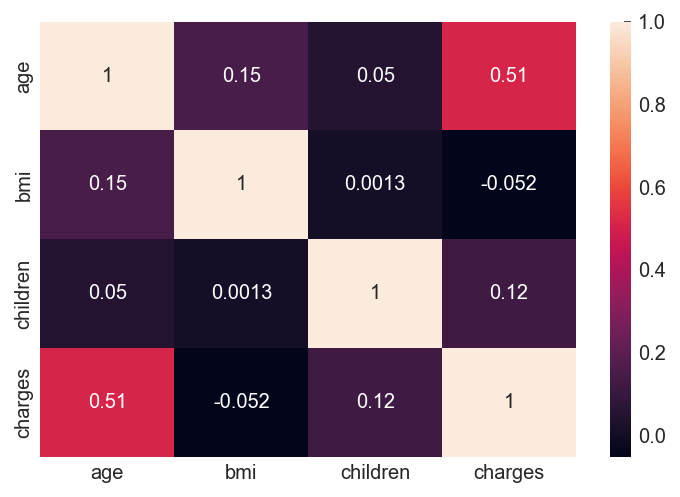

In [28]:
sns.heatmap(me_df.corr(),annot=True);

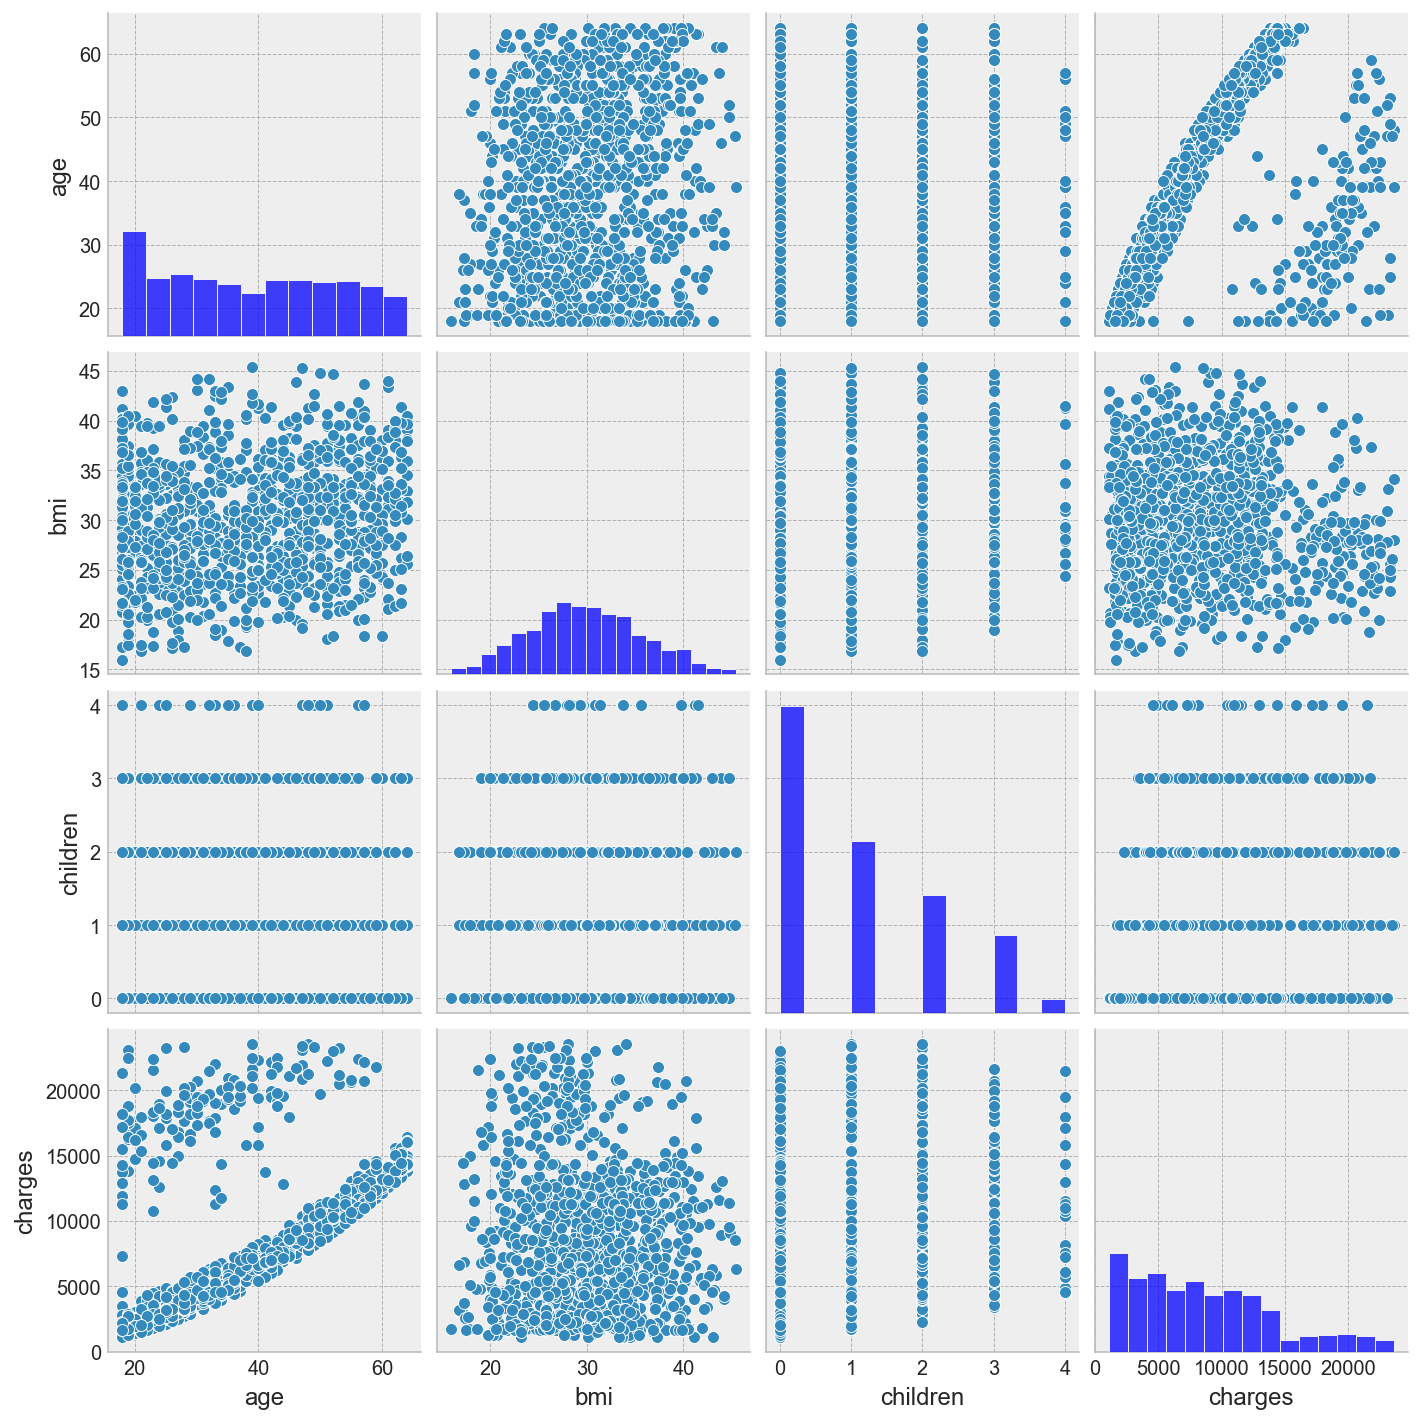

In [30]:
sns.pairplot(me_df);

# Machine Learing
* Build a system which can take features of Insurance like`age, sex, bmi, children, smoker, region,` etc.. and predicts the charges of Medical Insurance.
* Target Variable: > `Charges`

# identifying the output and input variables in dataset

In [31]:
me_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
y = me_df['charges']
X = me_df[['age','sex','bmi','children','smoker','region']]

# separating the dataset into `train` and `test`.

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(760, 6) (760,)
(327, 6) (327,)


In [35]:
X_train.head()

,age,sex,bmi,children,smoker,region
1005,26,male,31.065,0,no,northwest
951,38,male,29.260,2,no,northwest
455,46,female,19.950,2,no,northwest
542,29,female,31.160,0,no,northeast
815,24,male,25.800,0,no,southwest


### Separating Categorical and Numerical Columns

In [37]:
X_train.head()

,age,sex,bmi,children,smoker,region
1005,26,male,31.065,0,no,northwest
951,38,male,29.260,2,no,northwest
455,46,female,19.950,2,no,northwest
542,29,female,31.160,0,no,northeast
815,24,male,25.800,0,no,southwest


In [39]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [43]:
X_train_cat=X_train.select_dtypes(include=['object'])

In [45]:
X_train_cat.head()

,sex,smoker,region
1005,male,no,northwest
951,male,no,northwest
455,female,no,northwest
542,female,no,northeast
815,male,no,southwest


In [46]:
X_train_num=X_train.select_dtypes(include=['float64','int64'])

In [47]:
X_train_num.head()

,age,bmi,children
1005,26,31.065,0
951,38,29.260,2
455,46,19.950,2
542,29,31.160,0
815,24,25.800,0


## Scaling the -- Numerical Features --

In [55]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,age,bmi,children
1005,-0.872590,0.216997,-0.905791
951,-0.015783,-0.093275,0.886921
455,0.555421,-1.693624,0.886921
542,-0.658388,0.233327,-0.905791
815,-1.015391,-0.688034,-0.905791


In [57]:
X_train_num_transformed.describe()

,age,bmi,children
count,7.600000e+02,7.600000e+02,7.600000e+02
mean,-1.414074e-16,1.659491e-16,-1.869849e-17
std,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.443795e+00,-2.379488e+00,-9.057914e-01
25%,-8.725901e-01,-7.224132e-01,-9.057914e-01
50%,-1.578328e-02,-1.463262e-02,-9.435327e-03
75%,8.410235e-01,6.761733e-01,8.869207e-01
max,1.840632e+00,2.686279e+00,2.679633e+00


In [58]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [38.22105263 29.802625    1.01052632]
Std of each column: [14.00549061  5.8174807   1.11562809]


## Applying `OneHotEncoding` on Categorical Columns

In [60]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.514474
male      0.485526
Name: sex, dtype: float64

In [62]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.917105
yes    0.082895
Name: smoker, dtype: float64

In [64]:
X_train_cat['region'].value_counts(normalize=True)

northwest    0.260526
northeast    0.255263
southeast    0.246053
southwest    0.238158
Name: region, dtype: float64

In [66]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1005,1.0,0.0,1.0,0.0,0.0
951,1.0,0.0,1.0,0.0,0.0
455,0.0,0.0,1.0,0.0,0.0
542,0.0,0.0,0.0,0.0,0.0
815,1.0,0.0,0.0,0.0,1.0


## Concatinating the Encoded Categorical Features and Transformed Numerical Features

In [67]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1005,-0.872590,0.216997,-0.905791,1.0,0.0,1.0,0.0,0.0
951,-0.015783,-0.093275,0.886921,1.0,0.0,1.0,0.0,0.0
455,0.555421,-1.693624,0.886921,0.0,0.0,1.0,0.0,0.0
542,-0.658388,0.233327,-0.905791,0.0,0.0,0.0,0.0,0.0
815,-1.015391,-0.688034,-0.905791,1.0,0.0,0.0,0.0,1.0


## Preparing Test Data

In [68]:
X_test.head()

,age,sex,bmi,children,smoker,region
116,51,female,37.730,1,no,southeast
566,53,male,41.470,0,no,southeast
155,36,female,26.200,0,no,southwest
860,32,male,33.820,1,no,northwest
678,36,male,28.025,1,yes,northeast


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 116 to 1010
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       327 non-null    int64  
 1   sex       327 non-null    object 
 2   bmi       327 non-null    float64
 3   children  327 non-null    int64  
 4   smoker    327 non-null    object 
 5   region    327 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 17.9+ KB


In [70]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
116,female,no,southeast
566,male,no,southeast
155,female,no,southwest
860,male,no,northwest
678,male,yes,northeast


In [71]:
X_test_num=X_test.select_dtypes(include=['int64', 'float64'])
X_test_num.head()

,age,bmi,children
116,51,37.730,1
566,53,41.470,0
155,36,26.200,0
860,32,33.820,1
678,36,28.025,1


In [74]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,age,bmi,children
116,0.912424,1.362682,-0.009435
566,1.055225,2.005572,-0.905791
155,-0.158584,-0.619276,-0.905791
860,-0.444187,0.690570,-0.009435
678,-0.158584,-0.305566,-0.009435


In [76]:
X_test_cat_ohe = pd.DataFrame(index = X_test_cat.index)

X_test_cat_ohe.head()

""
116
566
155
860
678


In [77]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
116,0.0,0.0,0.0,1.0,0.0
566,1.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,1.0
860,1.0,0.0,1.0,0.0,0.0
678,1.0,1.0,0.0,0.0,0.0


In [78]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
116,0.912424,1.362682,-0.009435,0.0,0.0,0.0,1.0,0.0
566,1.055225,2.005572,-0.905791,1.0,0.0,0.0,1.0,0.0
155,-0.158584,-0.619276,-0.905791,0.0,0.0,0.0,0.0,1.0
860,-0.444187,0.690570,-0.009435,1.0,0.0,1.0,0.0,0.0
678,-0.158584,-0.305566,-0.009435,1.0,1.0,0.0,0.0,0.0


## Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [82]:
y_test_pred = regressor.predict(X_test_transformed)

In [83]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,10460.543861
566,9504.31030,10767.234843
155,4883.86600,6218.798549
860,4462.72180,6311.963018
678,20773.62775,20061.176052


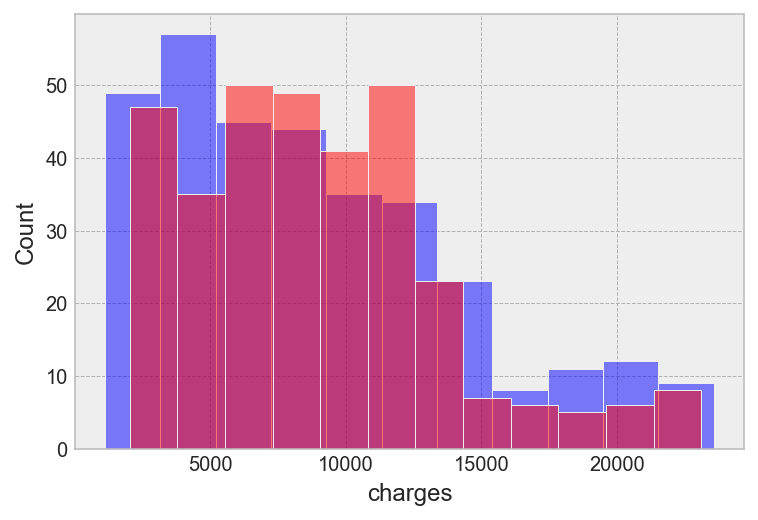

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [85]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1498.4694311659014
Mean Squared Error:  7980945.481277115
Root Mean Squared Error:  2825.0567217804874


### KNN Regression

In [87]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [89]:
y_test_pred = regressor.predict(X_test_transformed)

In [90]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,10581.241820
566,9504.31030,11165.387180
155,4883.86600,3790.802200
860,4462.72180,10822.020266
678,20773.62775,16997.330800


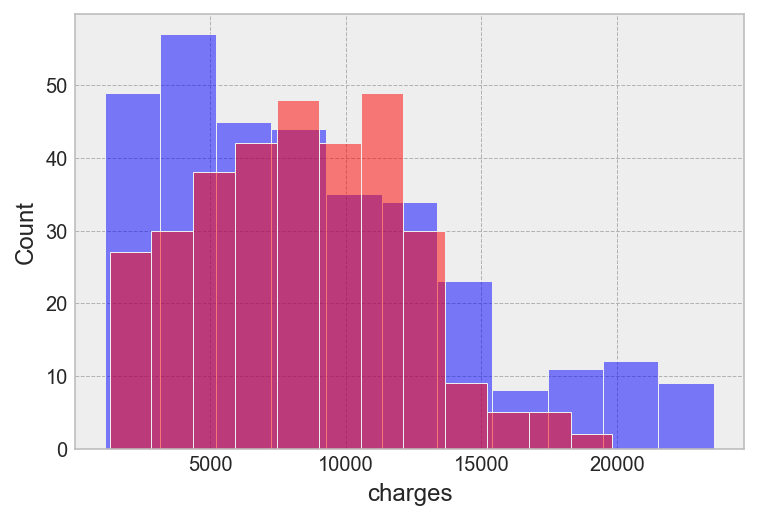

In [92]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [93]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2304.4513588287464
Mean Squared Error:  14166763.147288157
Root Mean Squared Error:  3763.876080224767


## Decision Tree Regression

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [95]:
y_test_pred = regressor.predict(X_test_transformed)

In [96]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,9855.13140
566,9504.31030,10602.38500
155,4883.86600,5227.98875
860,4462.72180,4667.60765
678,20773.62775,20296.86345


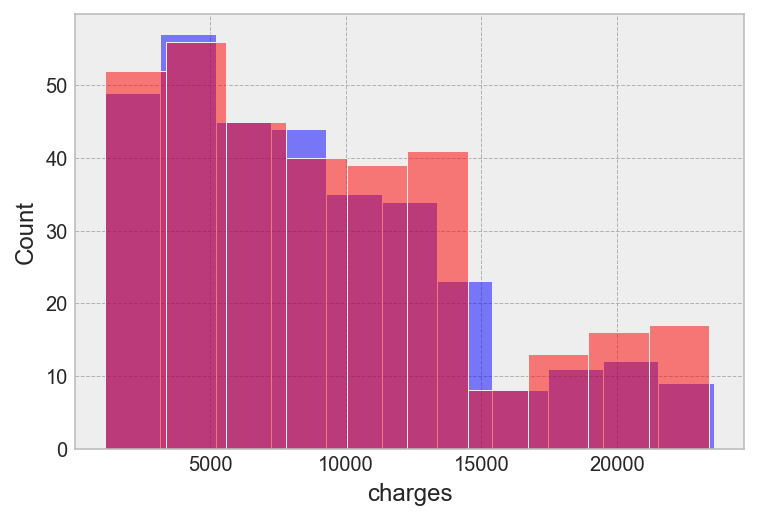

In [97]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [98]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1882.146836633028
Mean Squared Error:  22460687.599061236
Root Mean Squared Error:  4739.270787690996


## Random Forest Regression

In [100]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [101]:
y_test_pred = regressor.predict(X_test_transformed)

In [102]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,9865.382464
566,9504.31030,10407.814427
155,4883.86600,6210.546871
860,4462.72180,7943.591723
678,20773.62775,19944.361863


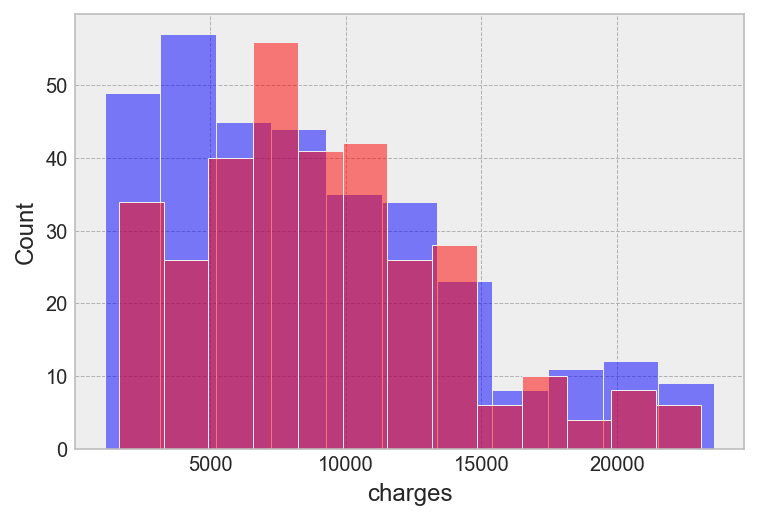

In [103]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [104]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1498.0805604969416
Mean Squared Error:  8808168.82028402
Root Mean Squared Error:  2967.8559298395903


## Support Vector Regressor

In [106]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
 #### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [107]:
y_test_pred = regressor.predict(X_test_transformed)

In [108]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,7759.232722
566,9504.31030,7753.677559
155,4883.86600,7694.848851
860,4462.72180,7676.668878
678,20773.62775,7709.262839


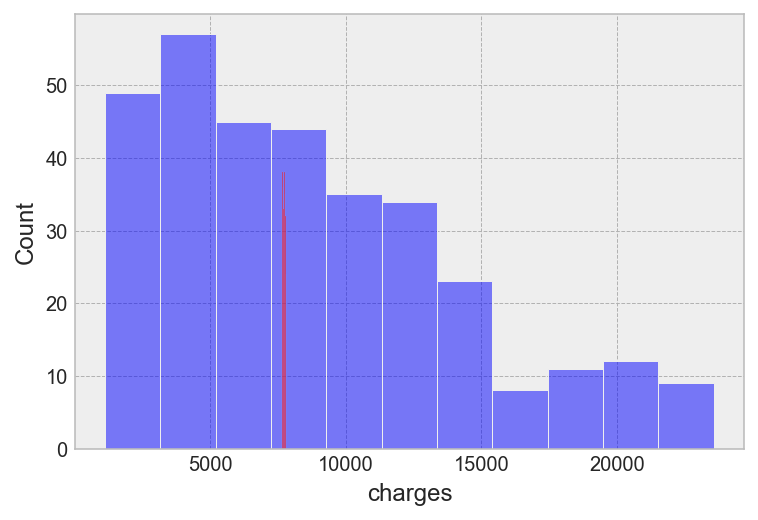

In [110]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [111]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4372.276921334815
Mean Squared Error:  31006654.46690407
Root Mean Squared Error:  5568.361919532896


## Gradient Boosting Regressor

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [114]:
y_test_pred = regressor.predict(X_test_transformed)

In [115]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
116,9877.60770,10023.924233
566,9504.31030,10619.731898
155,4883.86600,5688.507848
860,4462.72180,9423.312484
678,20773.62775,19506.873398


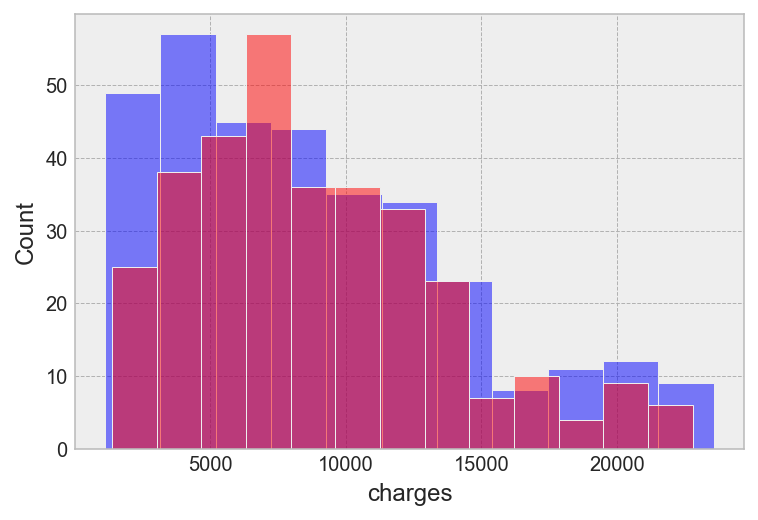

In [116]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [117]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1457.088148700461
Mean Squared Error:  8256179.987727237
Root Mean Squared Error:  2873.3569196546464
